In [45]:
import numpy as np
import pandas as pd
import os
from luwiji.text_proc import illustration
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [46]:
text = ['Ini adalah pensil',
        'Ini adalah pulpen saya dan ini pulpen dia',
        'Saya beli pensil ini',
        'Saya beli pulpen itu']
text

['Ini adalah pensil',
 'Ini adalah pulpen saya dan ini pulpen dia',
 'Saya beli pensil ini',
 'Saya beli pulpen itu']

## Bag of Word

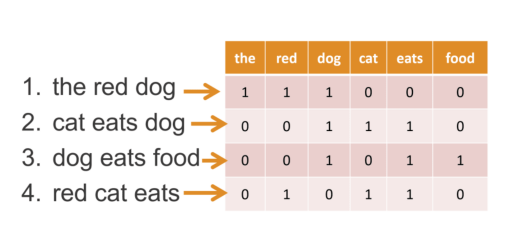

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Bag of Words.png')

plt.imshow(img)
plt.axis('off')
plt.show()


In [48]:
bow = CountVectorizer()
bow_matrix = bow.fit_transform(text)

In [49]:
bow_matrix

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [50]:
pd.DataFrame(bow_matrix.toarray(), columns=bow.get_feature_names_out(), index=text)

,adalah,beli,dan,dia,ini,itu,pensil,pulpen,saya
Ini adalah pensil,1,0,0,0,1,0,1,0,0
Ini adalah pulpen saya dan ini pulpen dia,1,0,1,1,2,0,0,2,1
Saya beli pensil ini,0,1,0,0,1,0,1,0,1
Saya beli pulpen itu,0,1,0,0,0,1,0,1,1


## Inverse Document Frequency (IDF)

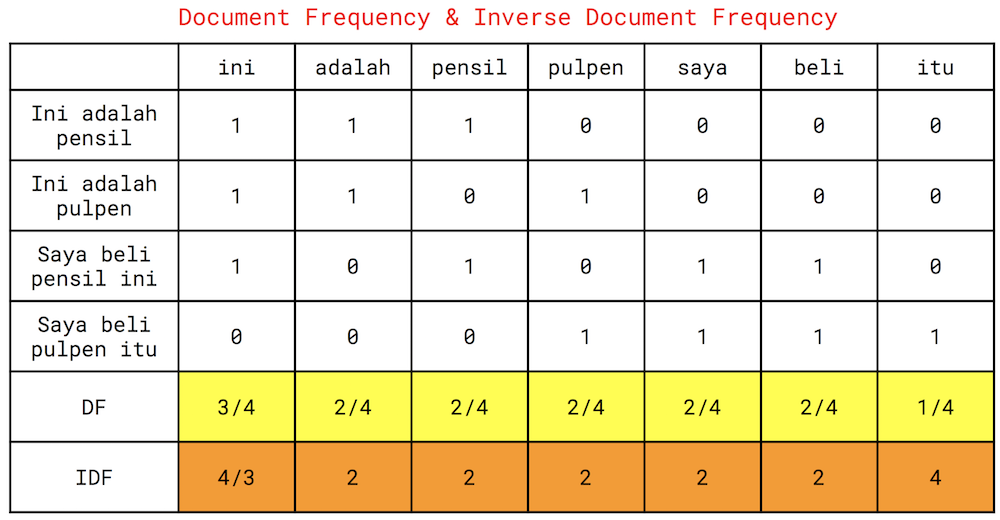

In [51]:
illustration.inverse_df

## Term Frequency - Inverse Document Frequency (TF-IDF)

In [52]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(text)

In [53]:
print(tfidf_matrix)

  (0, 6)	0.6136667440107333
  (0, 0)	0.6136667440107333
  (0, 4)	0.4968161174826459
  (1, 3)	0.3741092304629382
  (1, 2)	0.3741092304629382
  (1, 8)	0.23878907574757022
  (1, 7)	0.5899040287253255
  (1, 0)	0.2949520143626628
  (1, 4)	0.47757815149514043
  (2, 1)	0.5495783541874525
  (2, 8)	0.4449310425319985
  (2, 6)	0.5495783541874525
  (2, 4)	0.4449310425319985
  (3, 5)	0.6142260844216118
  (3, 1)	0.4842629000360712
  (3, 8)	0.392052553254539
  (3, 7)	0.4842629000360712


In [54]:
tfidf.get_feature_names_out()

array(['adalah', 'beli', 'dan', 'dia', 'ini', 'itu', 'pensil', 'pulpen',
       'saya'], dtype=object)

In [55]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out(), index=text)

,adalah,beli,dan,dia,ini,itu,pensil,pulpen,saya
Ini adalah pensil,0.613667,0.000000,0.000000,0.000000,0.496816,0.000000,0.613667,0.000000,0.000000
Ini adalah pulpen saya dan ini pulpen dia,0.294952,0.000000,0.374109,0.374109,0.477578,0.000000,0.000000,0.589904,0.238789
Saya beli pensil ini,0.000000,0.549578,0.000000,0.000000,0.444931,0.000000,0.549578,0.000000,0.444931
Saya beli pulpen itu,0.000000,0.484263,0.000000,0.000000,0.000000,0.614226,0.000000,0.484263,0.392053


kelemahan BoW dan TF-IDF:
- urutan ngga ngaruh buat pembobotannya

In [56]:
df = pd.read_csv('hasil_saya (1).csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,userName,content,score
0,Gadri Bandu,Saya kasih bintang tiga dulu soalnga gemenya b...,3
1,070_Putri Azzahra Nurdin,"Bagus bgtt. Dari segi story, grafik sampe puzz...",5
2,Novrealita Setiyana,Sejauh ini aku main aku suka banget sama model...,5
3,auah gelap,Semuanya sudah sempurna tapi Sangat disayangka...,3
4,Adi Nugroho,"Grafik bagus,story bagus,terutama archon quest...",5


In [57]:
sent = [word_tokenize(content.lower()) for content in tqdm(df.content)]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [58]:
sent

[['saya',
  'kasih',
  'bintang',
  'tiga',
  'dulu',
  'soalnga',
  'gemenya',
  'bagus',
  'tapi',
  'ketika',
  'mau',
  'update',
  'terlalu',
  'berat',
  'game',
  'nya',
  'tidak',
  'rama',
  'terlalu',
  'menghabiskan',
  'banyak',
  'kuota',
  'dan',
  'baterei',
  'bagaimana',
  'kedepan',
  'nanti',
  'ruang',
  'penyimpanan',
  'bisa',
  'full',
  'karena',
  'satu',
  'game',
  '.',
  'jika',
  'kedepan',
  'masalah',
  'ini',
  'tidak',
  'bisa',
  'di',
  'atasi',
  'saya',
  'berhenti',
  'menjadi',
  'player'],
 ['bagus',
  'bgtt',
  '.',
  'dari',
  'segi',
  'story',
  ',',
  'grafik',
  'sampe',
  'puzzle',
  'nya',
  'bener2',
  'bagus',
  ',',
  'pilihan',
  'character',
  'nya',
  'juga',
  'banyak',
  ',',
  'world',
  'nya',
  'luas',
  'bgtt',
  '.',
  'tapi',
  'kurangnya',
  'cuma',
  '1',
  'di',
  'ping',
  'nya',
  'yg',
  'kuning',
  'terus',
  ',',
  'kalo',
  'pake',
  'jaringan',
  'yg',
  'kurang',
  'stabil',
  'pas',
  'ngedomain',
  'malah',
  'm

In [59]:
tfidf.get_feature_names_out()

array(['adalah', 'beli', 'dan', 'dia', 'ini', 'itu', 'pensil', 'pulpen',
       'saya'], dtype=object)

# Word2Vec

In [67]:
# size = neuron
# window = berapa lihat kanan kirinya
# min_count = min berapa kali kata muncul baru dianggap vocab
# workers = jumlah cpu
# iter = epoch
# sg = skipgram (kalau 1 akan pake cbow) default = 0
model = Word2Vec(sent, size=128, window=5, min_count=3, workers=8, iter=1000, sg=0)

In [68]:
os.makedirs("model/w2v/", exist_ok=True)

In [69]:
model.save("model/w2v/review.w2v")

# Tugas Praktikum
1. load dataset yang diberikan menjadi dataframe
2. ubah kolom "content" menjadi vector menggunakan TFIDFVectorizer dan tampilkan hasilnya
3. Tampilkan nama fiturnya mengunakan get_features_name_out
4. Berikan penjelasan representasi output TFIDF dari sklearn
5. Upload hasilnya ke github dan kumpulkan link nya saja